In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
second_innings_run_rates_df = pd.read_csv('Datasets/dataset.csv')
ball_by_ball_2008_to_2022_df = pd.read_csv('Datasets/IPL_Ball_by_Ball_2008_2022.csv')
second_innings_2023_df = pd.read_csv('Datasets/csv2023.csv')
matches_df = pd.read_csv('Datasets/IPL_Matches_2008_2022.csv')

In [5]:
# Logistic Regression Win predictor

df = second_innings_run_rates_df


# Selecting features (X) and target (y)
X = df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_remaining', 'total_run_x', 'crr', 'rrr']]
y = df['results']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing categorical variables (batting_team, bowling_team, city) using OneHotEncoder
categorical_features = ['batting_team', 'bowling_team', 'city']
numeric_features = ['runs_left', 'balls_left', 'wickets_remaining', 'total_run_x', 'crr', 'rrr']

# Creating a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

# Step 4: Train a logistic regression model
model1 = LogisticRegression(random_state=42)
model1.fit(X_train_processed, y_train)

model2 = svm.LinearSVC(random_state=42)
model2.fit(X_train_processed, y_train)

# Step 5: Make predictions and evaluate the model
y_pred1 = model1.predict(X_test_processed)
accuracy1 = accuracy_score(y_test, y_pred1)
# Step 5: Make predictions and evaluate the model
y_pred2 = model2.predict(X_test_processed)
accuracy2 = accuracy_score(y_test, y_pred2)

print(f"LogReg Accuracy: {accuracy1}")
print(f"SVM Accuracy: {accuracy2}")

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LogReg Accuracy: 0.7998686740772009
SVM Accuracy: 0.7553585666713569


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

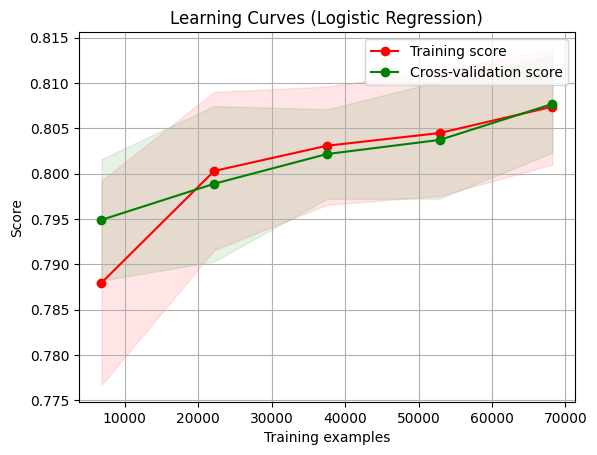

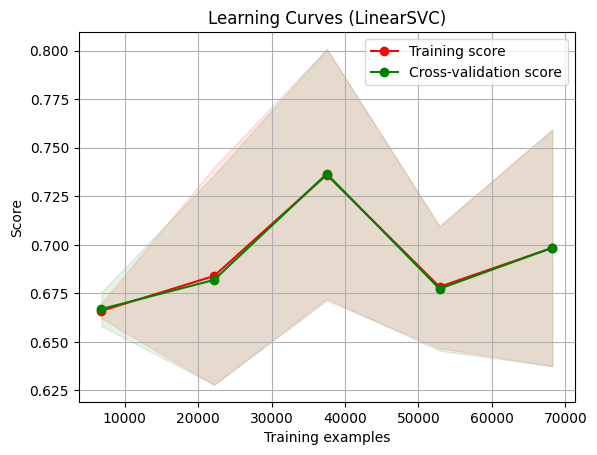

In [78]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for Logistic Regression model
plot_learning_curve(model1, "Learning Curves (Logistic Regression)", X_train_processed, y_train, cv=5)

# Plot learning curves for LinearSVC model
plot_learning_curve(model2, "Learning Curves (LinearSVC)", X_train_processed, y_train, cv=5)

plt.show()

In [64]:
total_run_x = 201
overs_bowled = 15
wickets_remaining = 8
target = 262
overs_left = 20 - overs_bowled
rrr = (target- total_run_x) / overs_left
runs_left = target - total_run_x

if overs_bowled == 0:
    crr = 0
else:
    crr = total_run_x / overs_bowled



new_data = pd.DataFrame({
    'batting_team': ['Punjab Kings'],
    'bowling_team': ['Kolkata Knight Riders'],
    'city': ['Kolkata'],
    'runs_left': [runs_left],
    'balls_left': [overs_left*6],
    'wickets_remaining': [wickets_remaining],
    'total_run_x': [total_run_x],
    'crr': [crr],
    'rrr': [rrr]
})

# Preprocess the new data
new_data_processed = preprocessor.transform(new_data)

# Make predictions for new data
result1 = model1.predict(new_data_processed)
result2 = model2.predict(new_data_processed)
print(f"LogReg redicted result for new data: {result1}")
print(f"SVM redicted result for new data: {result2}")

LogReg redicted result for new data: [0]
SVM redicted result for new data: [0]


C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

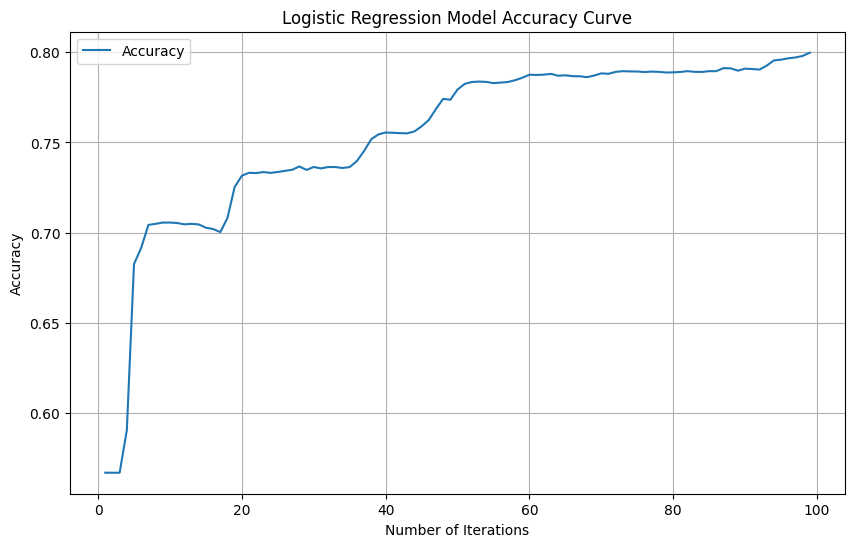

In [67]:
# Evaluate accuracy of LogReg model with different number of iterations

# List to store accuracy for each number of iterations
accuracy_list = []

# Range of iterations to test
iterations = range(1,100)

for i in iterations:
    # Train a logistic regression model with increased max_iter
    model = LogisticRegression(max_iter=i, random_state=42)
    model.fit(X_train_processed, y_train) 

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    accuracy_list.append(accuracy)

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracy_list, label='Accuracy')
plt.title('Logistic Regression Model Accuracy Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

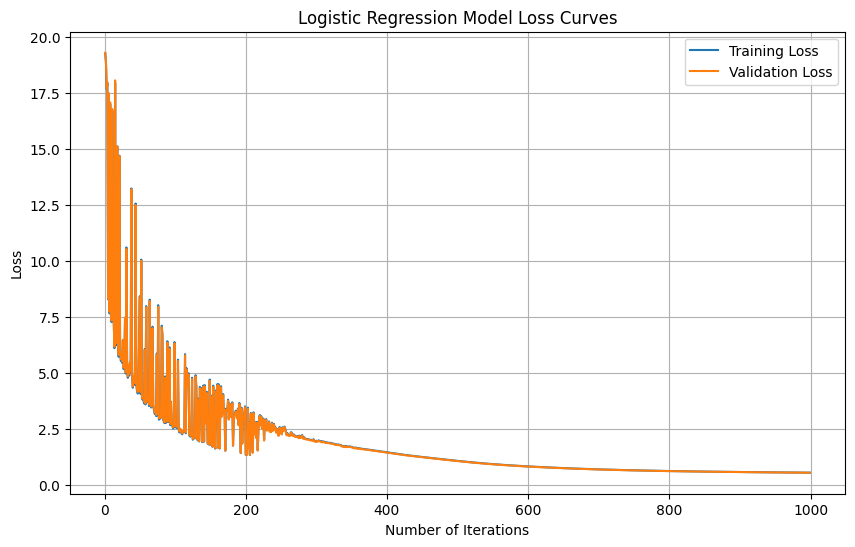

In [77]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

# Lists to store loss for each number of iterations
train_loss_list = []
val_loss_list = []

# Range of iterations to test
iterations = range(1, 1000)

# Initialize the model
model = SGDClassifier(loss='log_loss', warm_start=True, random_state=42)

for i in iterations:
    # Incrementally train the logistic regression model
    model.partial_fit(X_train_processed, y_train, classes=np.unique(y_train))

    # Make predictions and evaluate the model on the training data
    y_train_pred_proba = model.predict_proba(X_train_processed)
    train_loss = log_loss(y_train, y_train_pred_proba)
    train_loss_list.append(train_loss)

    # Make predictions and evaluate the model on the validation data
    y_val_pred_proba = model.predict_proba(X_test_processed)
    val_loss = log_loss(y_test, y_val_pred_proba)
    val_loss_list.append(val_loss)

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_loss_list, label='Training Loss')
plt.plot(iterations, val_loss_list, label='Validation Loss')
plt.title('Logistic Regression Model Loss Curves')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)
naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\rahul\AppData\Local\Packages\PythonSoftwareFoundation.Python.

KeyboardInterrupt: 

In [ ]:
# Support Vector Machine Win predictor

# Train the LinearSVC model
model = svm.LinearSVC(random_state=42)
model.fit(X_train_processed, y_train)

# Step 5: Make predictions and evaluate the modely_pred = model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Example: Use the model to predict results for new data
new_data = pd.DataFrame({
    'batting_team': ['Gujarat Titans'],
    'bowling_team': ['Rajasthan Royals'],
    'city': ['Ahemedabad'],
    'runs_left': [131],
    'balls_left': [125],
    'wickets_remaining': [10],
    'total_run_x': [131],
    'crr': [0.0],
    'rrr': [6.29]
})

# Preprocessing the new data
new_data_processed = preprocessor.transform(new_data)

# Making predictions for new data
result = model.predict(new_data_processed)
print(f"Predicted result for new data: {result}")


In [ ]:
# Defining the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_processed, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset (assuming second_innings_run_rates_df is defined)
df = second_innings_run_rates_df

# Step 1: Select features (X) and target (y)
X = df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_remaining', 'total_run_x', 'crr', 'rrr']]
y = df['results']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Preprocess categorical variables (batting_team, bowling_team, city) using OneHotEncoder
categorical_features = ['batting_team', 'bowling_team', 'city']
numeric_features = ['runs_left', 'balls_left', 'wickets_remaining', 'total_run_x', 'crr', 'rrr']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_processed = preprocessor.transform(X_test)

# Training a logistic regression model
model = LogisticRegression(random_state=42, solver='liblinear')  # Set solver to 'liblinear'
model.fit(X_train_processed, y_train)

# Retrieve the loss values during training
loss_values = np.zeros(model.n_iter_[0])  # Initialize array to store loss values
for i in range(model.n_iter_[0]):
    loss_values[i] = np.mean(np.log(1 + np.exp(-y_train * np.dot(X_train_processed, model.coef_.T))))  # Compute loss

# Plot the loss curve
plt.plot(np.arange(1, model.n_iter_[0] + 1), loss_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid(True)
plt.show()

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Example: Use the model to predict results for new data
new_data = pd.DataFrame({
    'batting_team': ['Lucknow Super Giants'],
    'bowling_team': ['Chennai Super Kings'],
    'city': ['Lucknow'],
    'runs_left': [43],
    'balls_left': [60],
    'wickets_remaining': [9],
    'total_run_x': [134],
    'crr': [8.93],
    'rrr': [8.6]
})

# Preprocess the new data
new_data_processed = preprocessor.transform(new_data)

# Make predictions for new data
result = model.predict(new_data_processed)
print(f"Predicted result for new data: {result}")
